In [4]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
from __future__ import print_function

%matplotlib inline

In [6]:
from __future__ import print_function

import csv
from src import main, utils
import sys

projects = main.load_projects()

snapshot_frms = dict()
changeset_frms = dict()
historical_frms = dict()

for project in projects:
    goldsets = main.load_goldsets(project)
    snapshot_ranks = main.read_ranks(project, "release")
    changeset_ranks = main.read_ranks(project, "changeset")
    try:
        historical_ranks = main.read_ranks(project, "temporal")
    except IOError:
        historical_ranks = list()


    snapshot_frms[project] = dict( (y,(x,z)) for x,y,z in main.get_frms(goldsets, snapshot_ranks))
    changeset_frms[project] = dict( (y,(x,z)) for x,y,z in  main.get_frms(goldsets, changeset_ranks))
    historical_frms[project] = dict( (y,(x,z)) for x,y,z in  main.get_frms(goldsets, historical_ranks))

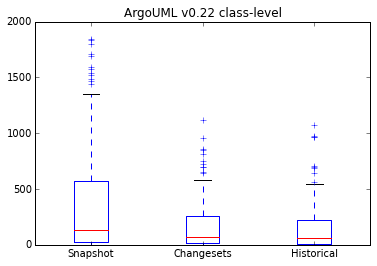

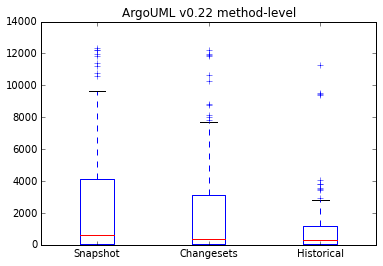

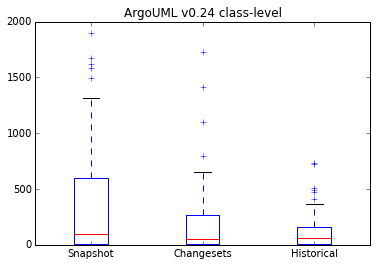

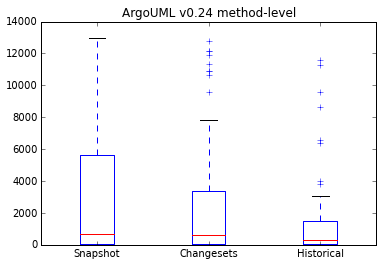

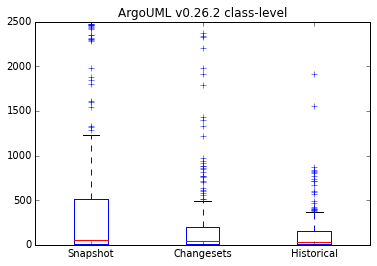

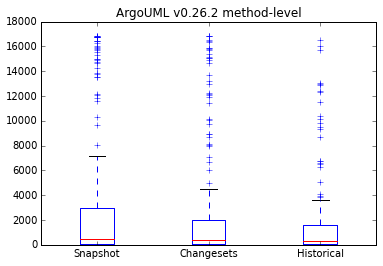

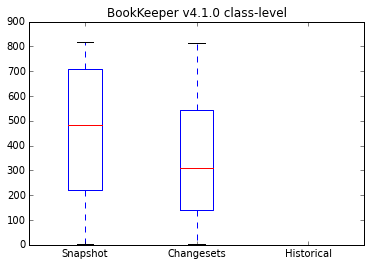

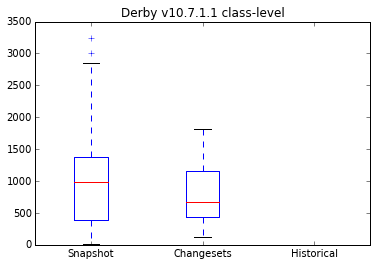

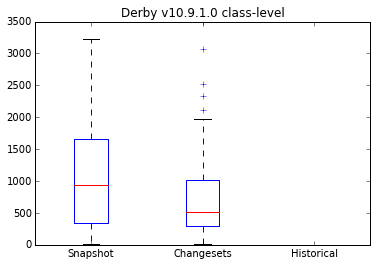

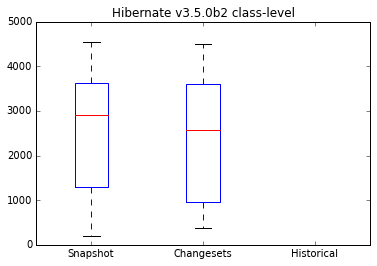

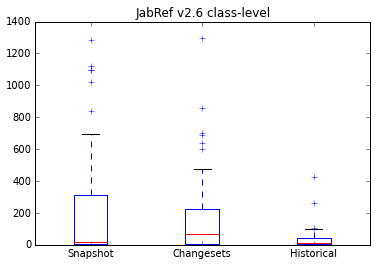

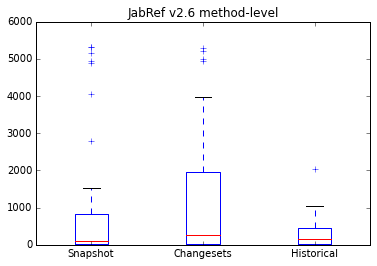

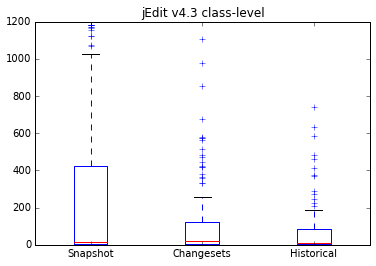

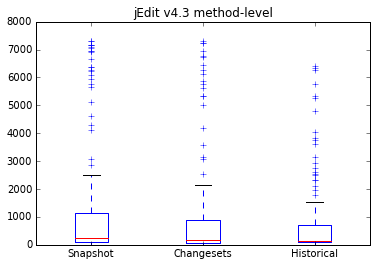

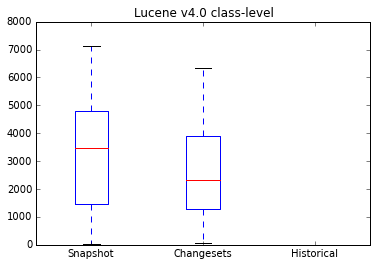

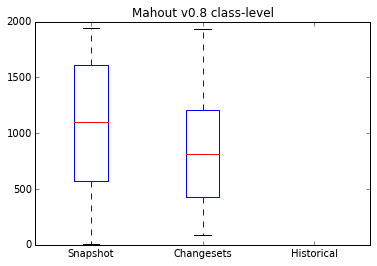

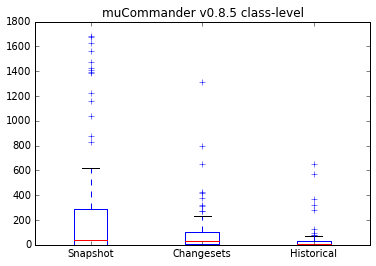

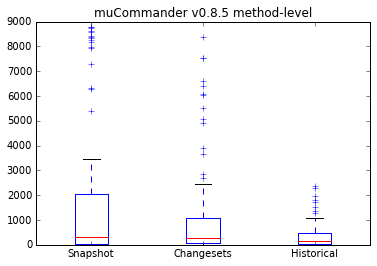

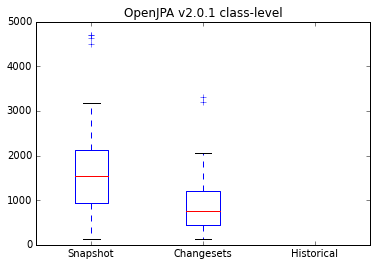

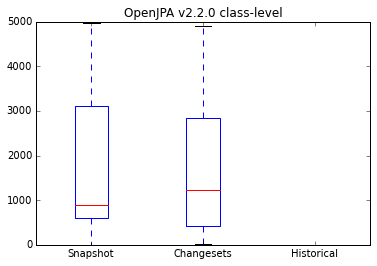

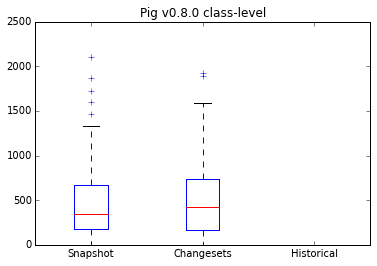

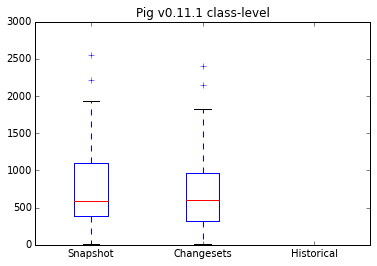

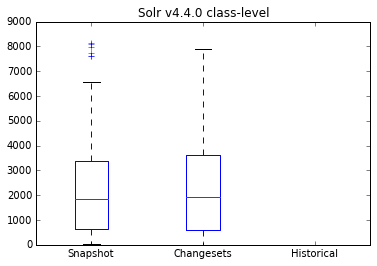

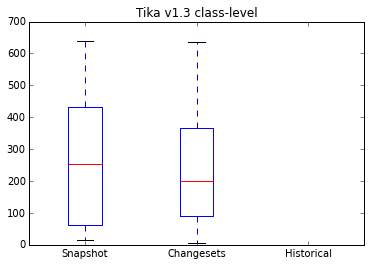

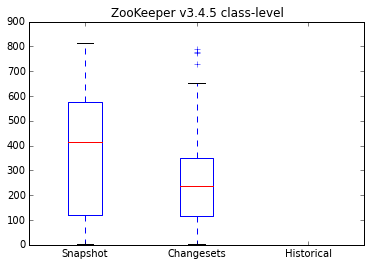

In [24]:
snapshot_all_method = list()
changeset_all_method = list()

snapshot_all_class = list()
changeset_all_class = list()

snapshot_6_method = list()
changeset_6_method = list()
historical_6_method = list()

snapshot_6_class = list()
changeset_6_class = list()
historical_6_class = list()


for i, project in enumerate(projects):
    fig = pyplot.figure(i)
    ax = pyplot.subplot(111)
    snapshot_norm = [ frm[0] for gid, frm in snapshot_frms[project].items() ]
    changeset_norm = [ frm[0] for gid, frm in changeset_frms[project].items() ]
    historical_norm = [ frm[0] for gid, frm in historical_frms[project].items() ]
    if project.level == 'method':
        snapshot_all_method.extend(snapshot_norm)
        changeset_all_method.extend(changeset_norm)
        if len(historical_norm):
            snapshot_6_method.extend(snapshot_norm)
            changeset_6_method.extend(changeset_norm)
            historical_6_method.extend(historical_norm)    
    else:
        snapshot_all_class.extend(snapshot_norm)
        changeset_all_class.extend(changeset_norm)
        historical_all_class.extend(historical_norm)
        if len(historical_norm):
            snapshot_6_class.extend(snapshot_norm)
            changeset_6_class.extend(changeset_norm)
            historical_6_class.extend(historical_norm)
        
    ax.boxplot([snapshot_norm, changeset_norm, historical_norm], labels=["Snapshot", "Changesets", "Historical"])
    pyplot.title(" ".join([project.printable_name, project.version, project.level + '-level']))
    

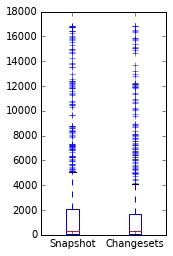

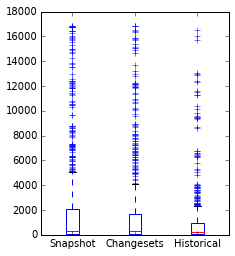

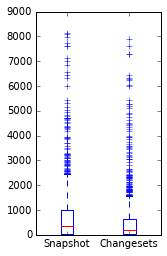

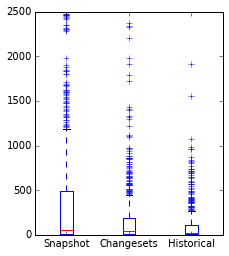

In [65]:
fig = pyplot.figure(len(projects), figsize=(2.24,4))
ax = pyplot.subplot(111)
ax.boxplot([snapshot_all_method, changeset_all_method], labels=["Snapshot", "Changesets"], widths=0.2)
#pyplot.title("RQ1 overall method-level")
fig.savefig('paper/figures/rq1-overall-method.pdf')
                        
fig = pyplot.figure(len(projects) + 2, figsize=(2.24,4))
ax = pyplot.subplot(111)
ax.boxplot([snapshot_all_class, changeset_all_class], labels=["Snapshot", "Changesets"], widths=0.2)
#pyplot.title("RQ1 overall class-level")
fig.savefig('paper/figures/rq1-overall-class.pdf')


fig = pyplot.figure(len(projects) + 1, figsize=(3.36,4))
ax = pyplot.subplot(111)
ax.boxplot([snapshot_6_method, changeset_6_method, historical_6_method], labels=["Snapshot", "Changesets", "Historical"], widths=0.2)
#pyplot.title("RQ2 overall method-level")
fig.savefig('paper/figures/rq2-overall-method.pdf')

fig = pyplot.figure(len(projects) + 3, figsize=(3.36,4))
ax = pyplot.subplot(111)
ax.boxplot([snapshot_6_class, changeset_6_class, historical_6_class], labels=["Snapshot", "Changesets", "Historical"], widths=0.2)
#pyplot.title("RQ2 overall class-level")
fig.savefig('paper/figures/rq2-overall-class.pdf')


pyplot.show()

In [52]:
for lvl in ['class', 'method']:
    print()
    print(lvl)
    ones = list()
    same = list()
    in10 = list()
    in50 = list()
    in500 = list()
    in100 = list()
    in1000 = list()
    other = list()
    skips = list()
    total = 0

    for project in projects:
        if project.level == lvl:
            for gid, changeset_frm in changeset_frms[project].items():
                if gid not in snapshot_frms[project]:
                    skips.append(gid)
                    continue

                total += 1
                changeset_frm = changeset_frms[project][gid][0]
                snapshot_frm = snapshot_frms[project][gid][0]
                a = abs(snapshot_frm - changeset_frm)
                if snapshot_frm == 1 and changeset_frm == 1:
                    ones.append(gid)
                if a == 0:
                    same.append(gid)
                if a < 10:
                    in10.append(gid)
                if a < 50:
                    in50.append(gid)
                else:
                    other.append(gid)

    print("ones:", len(ones), float(len(ones)) / total)
    print("same:", len(same), float(len(same)) / total)
    print("in10:", len(in10), float(len(in10)) / total)
    print("in50:", len(in50), float(len(in50)) / total)
    #print("in100:", len(in100), float(len(in100)) / total)
    #print("in500:", len(in500), float(len(in500)) / total)
    #print("in1000:", len(in1000), float(len(in1000)) / total)
    print("other:", len(other), float(len(other)) / total)
    print("total:", total)
    print("skipped:", len(skips))



class
ones: 17 0.0140032948929
same: 30 0.0247116968699
in10: 178 0.146622734761
in50: 356 0.293245469522
other: 858 0.706754530478
total: 1214
skipped: 0

method
ones: 7 0.0111287758347
same: 12 0.0190779014308
in10: 65 0.10333863275
in50: 151 0.240063593005
other: 478 0.759936406995
total: 629
skipped: 0


In [54]:

for lvl in ['class', 'method']:
    print()
    print(lvl)
    ones = list()
    same = list()
    in10 = list()
    in50 = list()
    in500 = list()
    in100 = list()
    in1000 = list()
    other = list()
    skips = list()
    total = 0

    for project in projects:
        if project.level == lvl:
            for gid, historical_frm in historical_frms[project].items():
                if gid not in snapshot_frms[project] or gid not in changeset_frms[project]:
                    skips.append(gid)
                    continue
                
                total += 1
                historical_frm = historical_frms[project][gid][0]
                snapshot_frm = snapshot_frms[project][gid][0]
                changeset_frm = changeset_frms[project][gid][0]
                a = abs(max(historical_frm, snapshot_frm, changeset_frm) - min(historical_frm, snapshot_frm, changeset_frm))
                if historical_frm == 1 and snapshot_frm == 1 and changeset_frm == 1:
                    ones.append(gid)
                if a == 0:
                    same.append(gid)
                if a < 10:
                    in10.append(gid)
                if a < 50:
                    in50.append(gid)
                else:
                    other.append(gid)

    print("ones:", len(ones), float(len(ones)) / total)
    print("same:", len(same), float(len(same)) / total)
    print("in10:", len(in10), float(len(in10)) / total)
    print("in50:", len(in50), float(len(in50)) / total)
    #print("in100:", len(in100), float(len(in100)) / total)
    #print("in500:", len(in500), float(len(in500)) / total)
    #print("in1000:", len(in1000), float(len(in1000)) / total)
    print("other:", len(other), float(len(other)) / total)
    print("total:", total)
    print("skipped:", len(skips))



class
ones: 7 0.0116086235489
same: 8 0.0132669983416
in10: 111 0.18407960199
in50: 230 0.381426202322
other: 373 0.618573797678
total: 603
skipped: 0

method
ones: 3 0.00504201680672
same: 3 0.00504201680672
in10: 23 0.0386554621849
in50: 77 0.129411764706
other: 518 0.870588235294
total: 595
skipped: 3


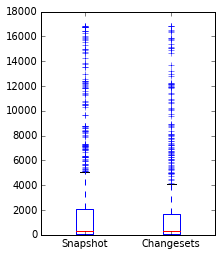

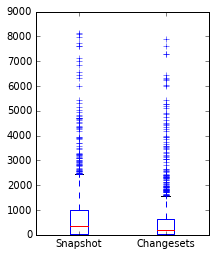

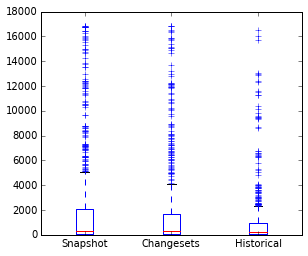

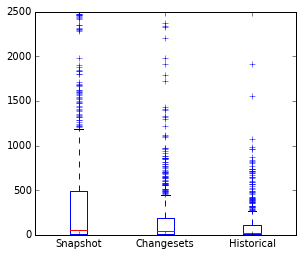

In [90]:
(6,4)
w=3.11/2
fig = pyplot.figure(figsize=(w*2,4))
pyplot.boxplot([snapshot_all_method, changeset_all_method], labels=["Snapshot", "Changesets"], widths=0.2)
#pyplot.title("RQ1 overall method-level")
fig.savefig('paper/figures/rq1-overall-method.pdf')
                        
fig = pyplot.figure(figsize=(w*2,4))
pyplot.boxplot([snapshot_all_class, changeset_all_class], labels=["Snapshot", "Changesets"], widths=0.2)
#pyplot.title("RQ1 overall class-level")
fig.savefig('paper/figures/rq1-overall-class.pdf')

fig = pyplot.figure(figsize=(w*3,4))
pyplot.boxplot([snapshot_6_method, changeset_6_method, historical_6_method], labels=["Snapshot", "Changesets", "Historical"], widths=0.2)
#pyplot.title("RQ2 overall method-level")
fig.savefig('paper/figures/rq2-overall-method.pdf')

fig = pyplot.figure(figsize=(w*3,4))
pyplot.boxplot([snapshot_6_class, changeset_6_class, historical_6_class], labels=["Snapshot", "Changesets", "Historical"], widths=0.2)
#pyplot.title("RQ2 overall class-level")
fig.savefig('paper/figures/rq2-overall-class.pdf')
